In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde 

In [2]:
df = pd.read_csv('Chicago_house.csv')

In [3]:
print(df.head())

   Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0


In [4]:
print("Số lượng giá trị NA trong mỗi cột:")

print(df.isna().sum())
df = df.dropna()

Số lượng giá trị NA trong mỗi cột:
Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64


In [5]:
df.dropna(inplace = True)
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


In [7]:
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


# A Graph Representation of Correlation of the Features

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

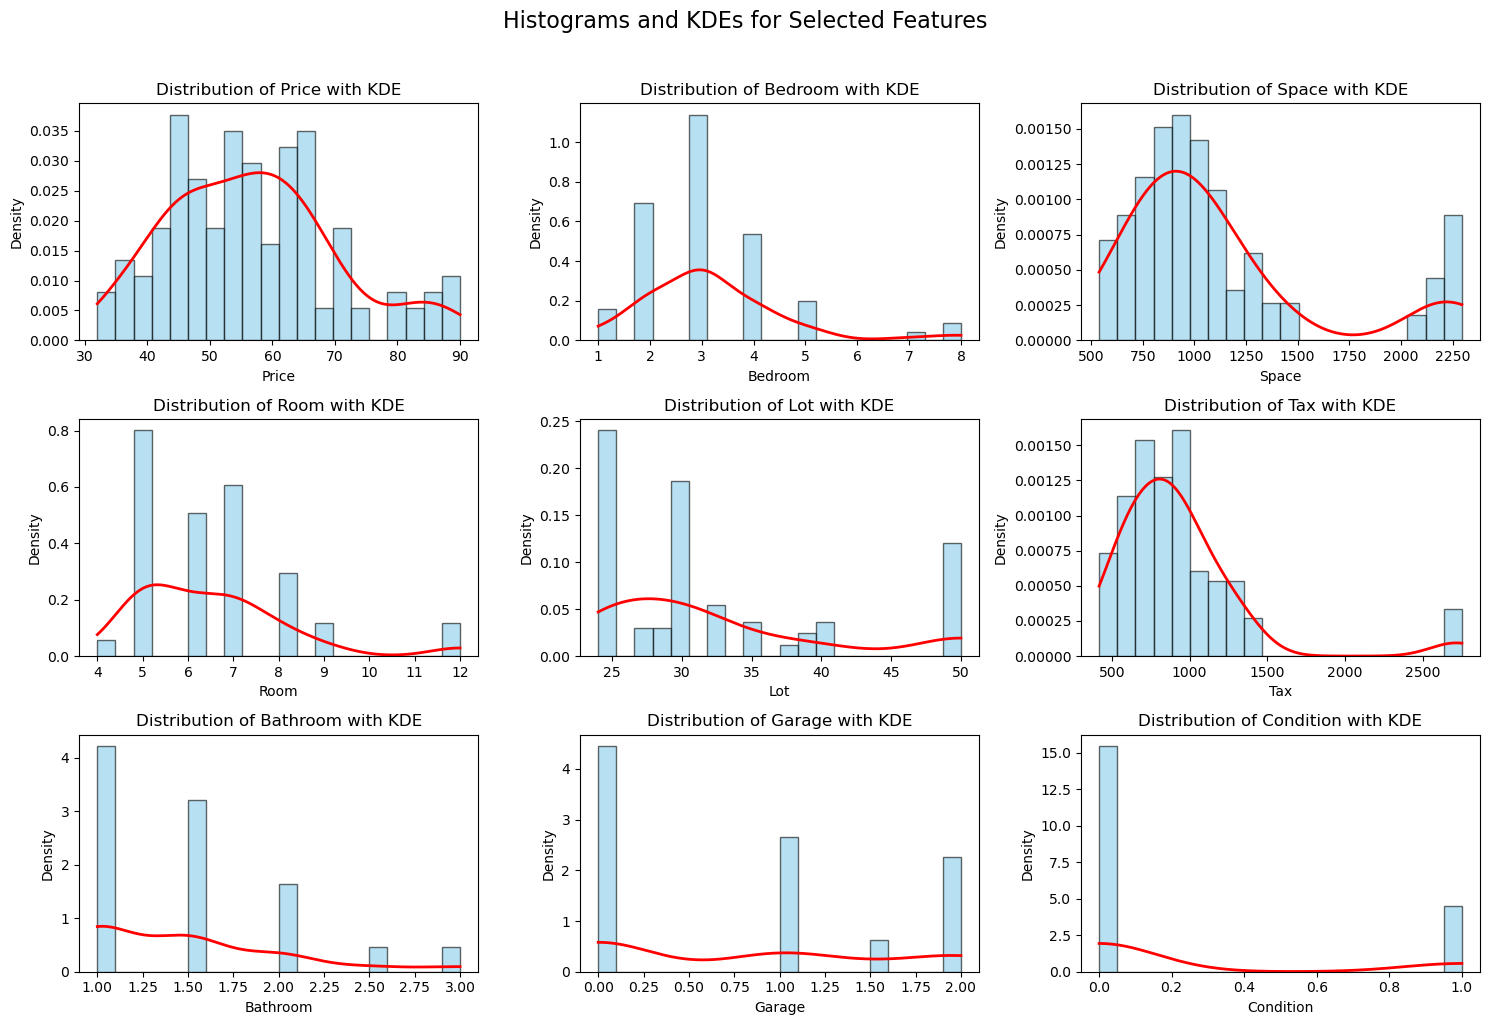

In [10]:
def plot_histograms_with_kde(df):
    columns = ['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']
    plt.figure(figsize=(15, 10))  # Set figure size
    plt.suptitle("Histograms and KDEs for Selected Features", fontsize=16, y=1.02)
    
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.6, density=True)
        
        kde = gaussian_kde(df[col])
        x_vals = np.linspace(df[col].min(), df[col].max(), 1000)
        plt.plot(x_vals, kde(x_vals), color='red', lw=2) 
        
        plt.title(f'Distribution of {col} with KDE')
        plt.xlabel(col)
        plt.ylabel('Density')
        
    plt.tight_layout()
    plt.show()
    
plot_histograms_with_kde(df)

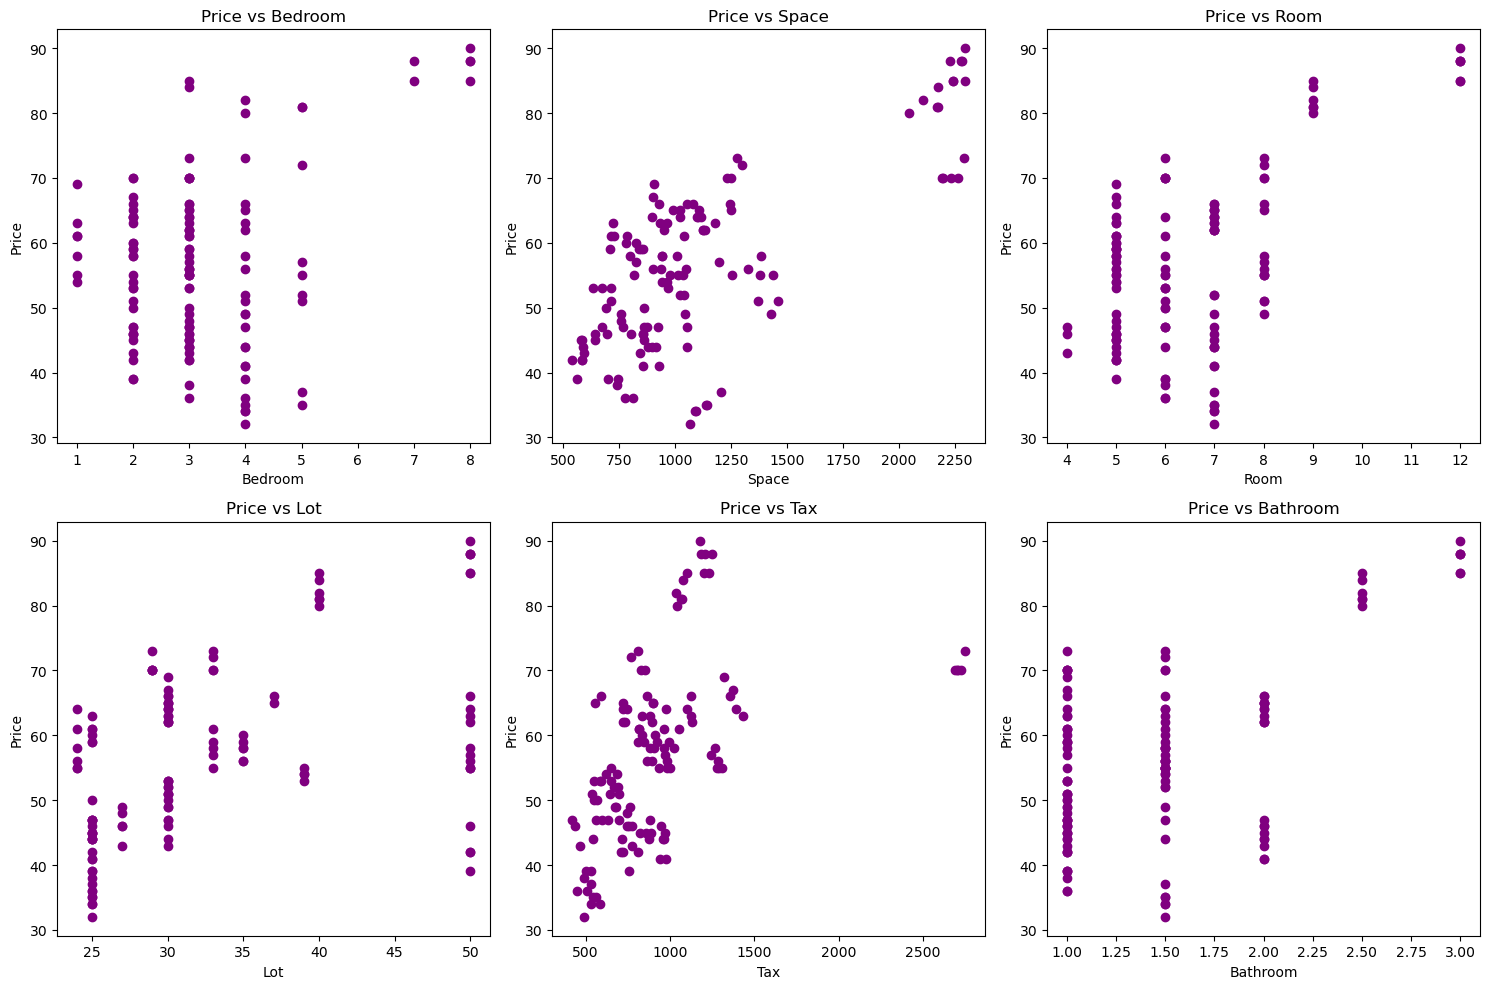

In [11]:
def plot_scatter(df):
    scatter_columns = ['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(scatter_columns, 1):
        plt.subplot(2, 3, i)  # Grid the chart 2x3
        plt.scatter(df[col], df['Price'], color='purple')
        plt.title(f'Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
    
plot_scatter(df)

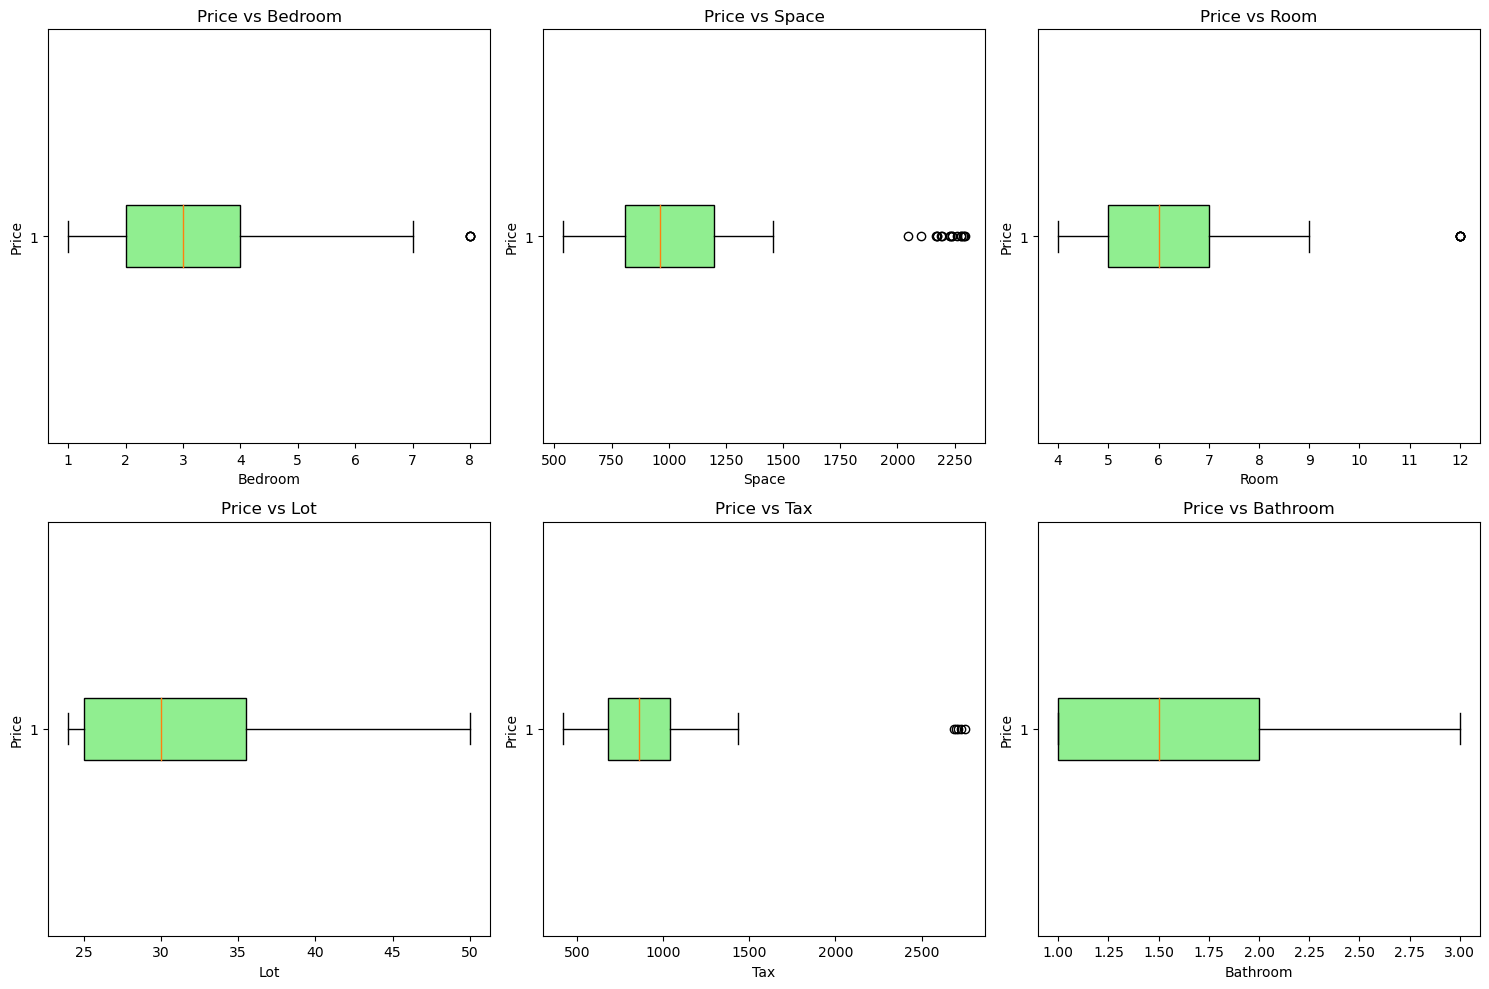

In [12]:
def plot_boxplots(df):
    box_columns = ['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(box_columns, 1):
        plt.subplot(2, 3, i)
        plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title(f'Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

plot_boxplots(df)

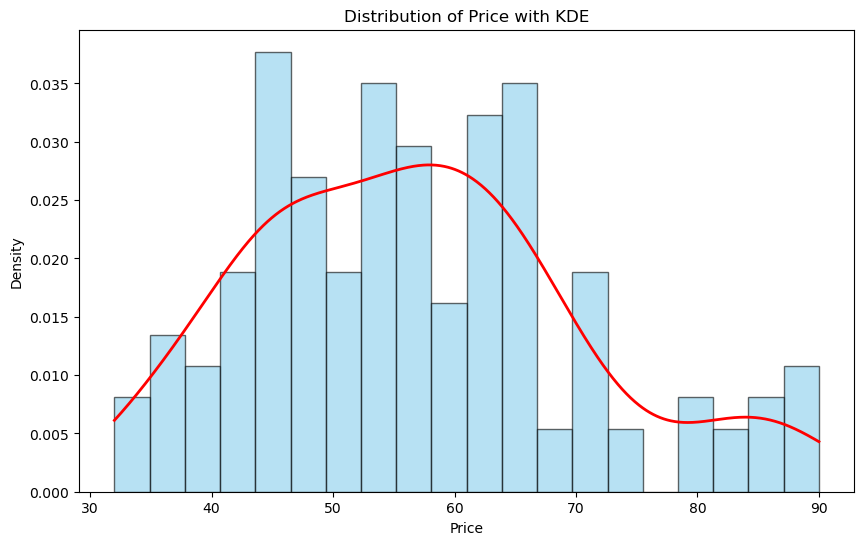

In [13]:
plt.figure(figsize=(10, 6))

plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black', alpha=0.6, density=True)

kde = gaussian_kde(df['Price'])
x_vals = np.linspace(df['Price'].min(), df['Price'].max(), 1000)
plt.plot(x_vals, kde(x_vals), color='red', lw=2)  # Đường mật độ KDE

plt.title('Distribution of Price with KDE')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

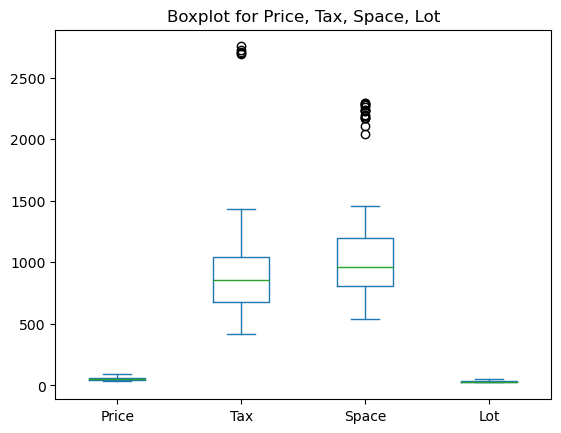

In [14]:
df[['Price', 'Tax', 'Space', 'Lot']].plot(kind='box')
plt.title('Boxplot for Price, Tax, Space, Lot')
plt.show()

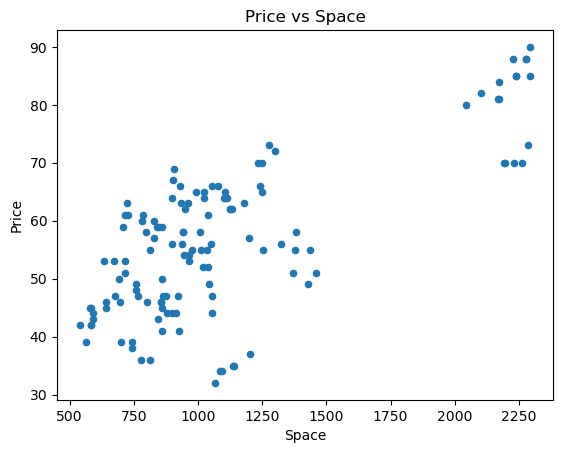

In [15]:
df.plot(kind='scatter', x='Space', y='Price')
plt.title('Price vs Space')
plt.show()

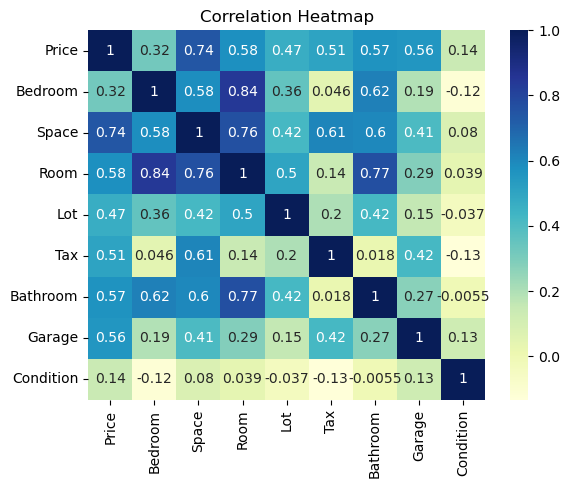

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

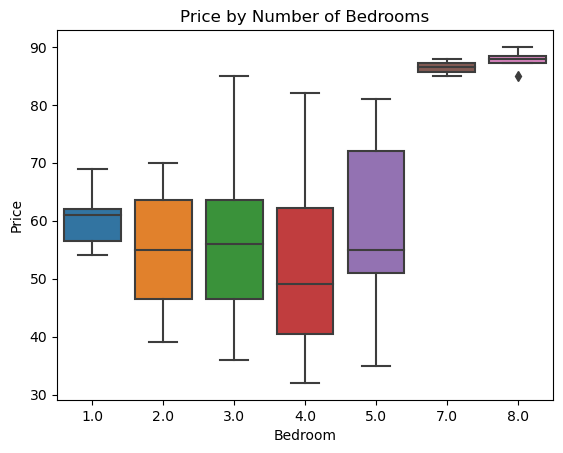

In [17]:
sns.boxplot(x='Bedroom', y='Price', data=df)
plt.title('Price by Number of Bedrooms')
plt.show()

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X = df[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']] 
y = df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection

# 5.1 Linear Regression

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
lr_predictions = lr_model.predict(X_test)

In [24]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# 5.2 Random Forest Regressor

In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
rf_predictions = rf_model.predict(X_test)

In [27]:
rf_mse = mean_squared_error(y_test,rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Representation and Comparison of Results

In [28]:
print("Random Forest Regressor:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')

print("\nLinear Regression:")
print(f'Mean Squared Error: {lr_mse}')
print(f'R-squared: {lr_r2}')

Random Forest Regressor:
Mean Squared Error: 9.699415384615385
R-squared: 0.9493761210623842

Linear Regression:
Mean Squared Error: 57.58007022464955
R-squared: 0.6994740003716562


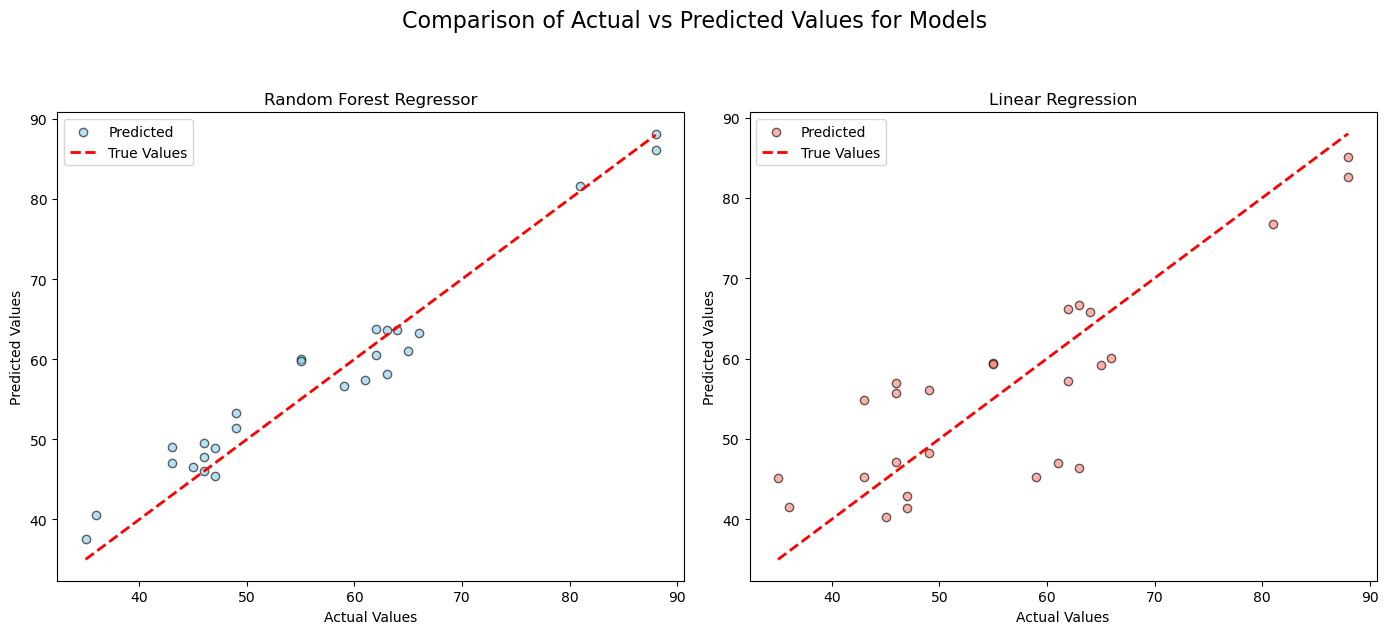

In [29]:
plt.figure(figsize=(14, 6))

# Graph of Random Forest Regressor
plt.subplot(1, 2, 1)  # Create first subchart
plt.scatter(y_test, rf_predictions, color='skyblue', alpha=0.6, edgecolor='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='True Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor')
plt.legend()

# Linear Regression Chart
plt.subplot(1, 2, 2)  # Create second subchart
plt.scatter(y_test, lr_predictions, color='salmon', alpha=0.6, edgecolor='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='True Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()

plt.suptitle('Comparison of Actual vs Predicted Values for Models', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()